<img src="https://skewthescript.org/s/money_college_scale.jpg">

## Data Science Project: Use data to determine the best and worst colleges for conquering student debt.

### Notebook 4: Machine Learning

Does college pay off? We'll use some of the latest data from the US Department of Education's <a href="https://collegescorecard.ed.gov/data/">College Scorecard Database</a> to answer that question. 

In this notebook (the 4th of 4 total notebooks), you'll use R to add polynomial terms to your multiple regression models (i.e. polynomial regression). Then, you'll use the principles of machine learning to tune models for a prediction task on *unseen* data.

In [1]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code.
# This command downloads a useful package of R commands
library(coursekata)

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2

── CourseKata packages ───────────────────────────────────── coursekata 0.9.3 ──
✔ supernova           2.5.6         ✔ fivethirtyeightdata 0.1.0  
✔ mosaic              1.8.4.2       ✔ Lock5withR          1.2.2  
✔ lsr                 0.5.2         ✔ dslabs              0.7.4  
✔ fivethirtyeight     0.6.2         



#### The Dataset (`four_year_colleges.csv`)
In this notebook, we'll be using the `four_year_colleges.csv` file, which only includes schools that offer four-year bachelors degrees and/or higher graduate degrees. Institutions that offer only associates degrees or profession certificates, such as community colleges and trade schools, have been excluded. Community colleges and trade schools often have different goals (e.g. facilitating transfers) than institutions that offer four-year bachelors degrees. By comparing four-year colleges only to other four-year colleges, we'll have clearer analyses and conclusions.

This dataset is a subset of the US Department of Education's <a href="https://collegescorecard.ed.gov/data/">College Scorecard Database</a>, which shows various metrics of cost, enrollment, size, student debt, student demographics, and alumni success. The database describes almost every University, college, community college, trade school, and certificate program in the United States. The data is current as of the 2020-2021 school year.

##### Variables
- `OPEID` - Official ID number for college/institution
- `name` - Name of college/institution
- `city` - City in which college/institution is located
- `state` - State in which college/institution is located
- `region` - US geographic region in which the college/institution is located
- `median_debt` - The median student loan amount, upon entering repayment, in thousands of dollars
- `default_rate` - Percent of school's borrowers in default on student loans (from recent cohorts). Includes students who graduate, transfer, or dropout.
- `highest_degree`: Highest degree awarded at institution (values: `Certificate`, `Associates`,`Bachelors`,`Graduate`)
- `ownership`: Control of institution (values: `Public`,`Private nonprofit`,`Private for-profit`)
- `locale`: Locale surrounding institution (values: `Large City`,`Small City`,`Suburb`,`Town`,`Rural`)
- `hbcu`: Indicator for historically black college and university (values: `No`,`Yes`)
- `admit_rate`: Percent of applicants offered admission
- `SAT_avg`: Average equivalent SAT score of admitted students
- `online_only`: Indicator for whether college only provides distance (online) classes (values: `No`,`Yes`)
- `enrollment`: Number of undergraduate or certificate-seeking students enrolled
- `net_price`: Average cost of attendance (includes tuition, books, & living expenses) minus average financial aid, in thousands of dollars
- `avg_cost`: Average cost of attendance (includes tuition, books, & living expenses), in thousands of dollars
- `net_tuition`: Net tuition revenue (tuition minus average discounts and allowances) per student, in thousands of dollars
- `ed_spending_per_student`: Instructional expenditures per student, in thousands of dollars
- `avg_faculty_salary`: Average faculty salary, in thousands of dollars
- `pct_PELL`: Percent of undegraduates who received a [PELL grant](https://www.benefits.gov/benefit/417)
- `pct_fed_loan`: Percent of undergraduates who received a federal student loan
- `grad_rate`: Graduation rate, given 150% of normal time (e.g. graduate within 6 years for a 4-year degree)
- `pct_firstgen`: Share of students that are first generation in their family to attend college
- `med_fam_income`: Median income of students' families, in thousands of dollars
- `med_alum_earnings`: Median earnings of students working and no longer enrolled 10 years after entry, in thousands of dollars

##### Detailed description and technical notes <a href="https://docs.google.com/spreadsheets/d/1fa_Bd3_eYEmxvKPcu3hK2Dgazdk-9bkeJwONMS6u43Q/edit?usp=sharing">here</a>

In [2]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code.
# This command downloads data from the file 'colleges.csv' and stores it in an object called `dat`
dat <- read.csv('https://skewthescript.org/s/four_year_colleges.csv')

### 1.0 - Motivating non-linear regression

So far, we've focused entirely on **linear regression** and **multiple linear regression** models, which use linear functions to relate predictors (e.g. `net_tuition`,`grad_rate`,`pct_PELL`) to the outcome (`default_rate`). 

In this notebook, we're going to investigate ways to model **non-linear** relationships. To make this task a bit more manageable at the start, let's reduce the size of our dataset by taking a random sample of 20 colleges from the `dat` dataframe. We will store our sample in a new R dataframe called `sample_dat`.

In [3]:
## Run this code but do not edit it
# create a data set to train the model with 20 randomnly selected observations
set.seed(2)
sample_dat <- sample(dat, size = 20)

**Note:** When getting a random sample, we'll get different results each time we run our code because it's ... well ... random. This can be quite annoying. So, in the code above, we used the command `set.seed(2)`. This ensures that each time the code is executed, we get the same results for our random sample - the results stored in seed `2`. We could have also set the seed to `1` or `3` or `845` or `12345`. The seed numbers serve merely as a unique ID that corresponds to a certain result from a random draw. By setting a certain seed, we'll always get a certain random draw.

**1.1** Let's take a look at our sample data set. Print out the `head` and `dim` of this sample dataset. 

In [4]:
## Your code here
head(sample_dat)

,OPEID,name,city,state,region,median_debt,default_rate,highest_degree,ownership,locale,⋯,net_tuition,ed_spending_per_student,avg_faculty_salary,pct_PELL,pct_fed_loan,grad_rate,pct_firstgen,med_fam_income,med_alum_earnings,orig.id
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
975,379400,Saint Martin's University,Lacey,WA,Far West,17.125,2.6,Graduate,Private nonprofit,Small City,⋯,19.469,8.701,6.516,37.01,53.35,61.44,34.09524,41.889,55.283,975
710,316100,Northeastern State University,Tahlequah,OK,Rockies & Southwest,12.490,3.7,Graduate,Public,Town,⋯,6.301,9.217,7.159,45.16,42.57,35.54,41.80791,30.816,40.170,710
774,330400,Muhlenberg College,Allentown,PA,Northeast,23.250,1.9,Bachelors,Private nonprofit,Small City,⋯,21.367,16.083,9.149,18.61,56.06,81.28,15.76705,105.406,68.629,774
416,231800,Spring Arbor University,Spring Arbor,MI,Midwest,24.645,3.6,Graduate,Private nonprofit,Suburb,⋯,12.539,5.974,5.819,33.25,62.04,64.69,35.16598,52.494,44.111,416
392,223400,Adrian College,Adrian,MI,Midwest,14.750,7.6,Graduate,Private nonprofit,Town,⋯,12.417,8.946,6.312,35.02,85.91,53.91,31.00529,68.386,51.378,392
273,189200,University of Iowa,Iowa City,IA,Midwest,17.750,2.2,Graduate,Public,Small City,⋯,14.659,14.478,11.790,19.45,41.82,72.19,22.31285,72.993,58.274,273


In [5]:
## Your code here
dim(sample_dat)

[1] 20 27

In prior notebooks, we focused on institutional and economic predictors of student loan default rates. In this notebook, we'll begin by analyzing an *academic* variable: `SAT_avg`. This variable shows the average SAT score of students who matriculate to a college. Let's start by visually exploring the relationship between `SAT_avg` and `default_rate`:

**1.2 -** Create a scatterplot that visualizes the relationship between `SAT_avg` (predictor) and `default_rate` (outcome) from the dataset `sample_dat`. Just plot the raw data, without plotting any model.

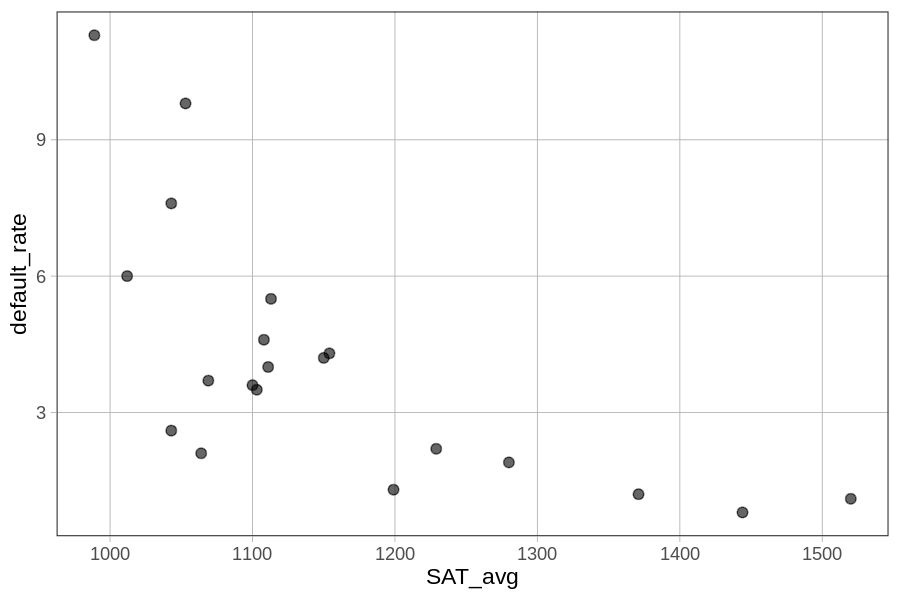

In [6]:
## Run this code but do not edit it
# create scatterplot: default_rate ~ SAT_avg
gf_point(default_rate ~ SAT_avg, data = sample_dat)

**1.3 -** Describe the direction of the relationship between `SAT_avg` and `default_rate`. Is it positive or negative? Why do you think this is?

**There is a non-linear negative relationship between mean SAT and default rate; that is, default rates tend to decrease as SAT scores increase. This is reasonable because (1) schools with high mean SAT scores tend to have more academically rigorous students who are more likely to graduate and have positive post-graduate outcomes and (2) default rates start to converge to a certain non-zero value as it is quite unlikely to have any school where no students default their debt.** 

**1.4 -** Create the same scatterplot as in question **1.2**, but with the simple linear model between `default_rate` (outcome) and `SAT_avg` (predictor) overlayed on top.

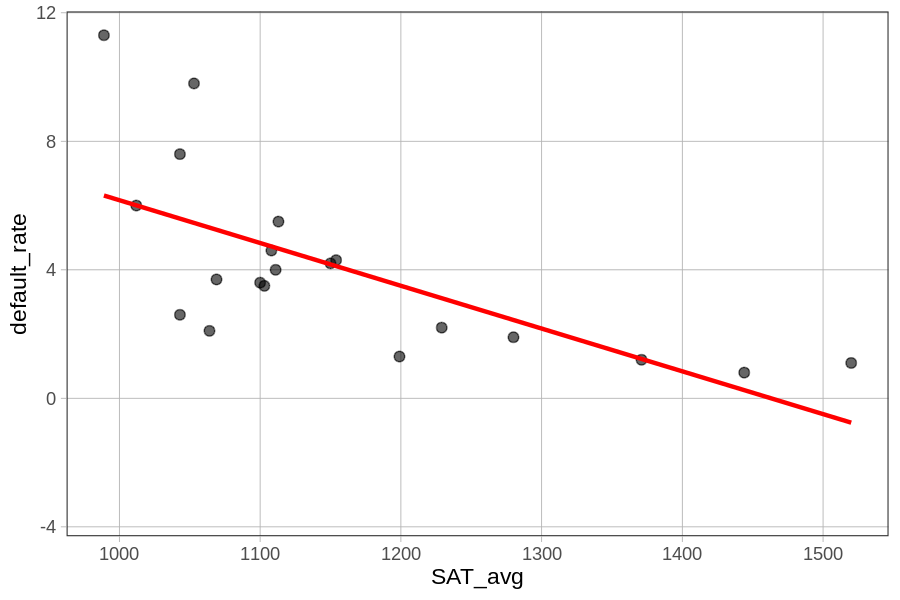

In [7]:
## Your code here
gf_point(default_rate~SAT_avg, data=sample_dat) %>% gf_lm(color="red")

**1.5 -** Would you say that this model provides a "good" fit for this dataset? Explain.

**The linear model does not seem to be a good fit for this dataset as there is non-linearity/heteroskedasticity.** 

**1.6 -** Use the `lm` command to fit the linear regression model, where we use `SAT_avg` (predictor) to predict `default_rate` (outcome) in the dataset `sample_dat`. Store the model in a variable named `sat_model_1` and use the `summary` command to print out information about the model fit.

In [8]:
## Your code here
sat_model_1 <- lm(default_rate~SAT_avg, data=dat)
summary(sat_model_1)


Call:
lm(formula = default_rate ~ SAT_avg, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5622 -1.7820 -0.3685  1.2048 19.9196 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.8956021  0.7799824   34.48   <2e-16 ***
SAT_avg     -0.0191443  0.0006807  -28.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.829 on 1051 degrees of freedom
Multiple R-squared:  0.4294,	Adjusted R-squared:  0.4289 
F-statistic:   791 on 1 and 1051 DF,  p-value: < 2.2e-16


**1.7** - Find and report the $R^2$ value. Does this value indicate that this model provides a strong fit for this dataset? Explain.

**R^2 = 42.94%; this low R^2 value indicates SAT_avg is a weak predictor of default_rate as only about 43% of the variability in default_rate can be explained by SAT_avg.** 

**1.8** - If this model were curved, rather than linear, do you believe the $R^2$ could be higher? Explain.

**A curved model would be better at minimizing the residuals of points at the extreme ends of SAT_avg and thus would yield a higher R^2 value.** 

### 2.0 - Polynomial regression

Recall that simple linear regression follows this formula:

$$
\hat{y} = \beta_{0} + \beta_{1}x
$$
Where:

- $\beta_0$ is the intercept

- $\beta_1$ is the slope (coefficient of $x$)

- $\hat{y}$ is the predicted `default_rate`

- $x$ is the value of `SAT_avg`

If we want to capture the curvature in a scatter plot by creating a non-linear model, we can use a technique called **polynomial regression**. For example, we could use a degree 2 polynomial (quadratic), which looks like this:

$$
\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^2
$$

Where:

- $\beta_0$ is the intercept

- $\beta_1$ is the coefficient of $x_1$ (linear term)

- $\beta_2$ is the coefficient of $x_1^2$ (squared term)

- $\hat{y}$ is the predicted `default_rate`

- $x$ is the `SAT_avg`

- $x^2$ is the `SAT_avg` to the power of 2

Below, we visualize the fit of this degree-2 polynomial (quadratic) model between `SAT_avg` and `default_rate`:

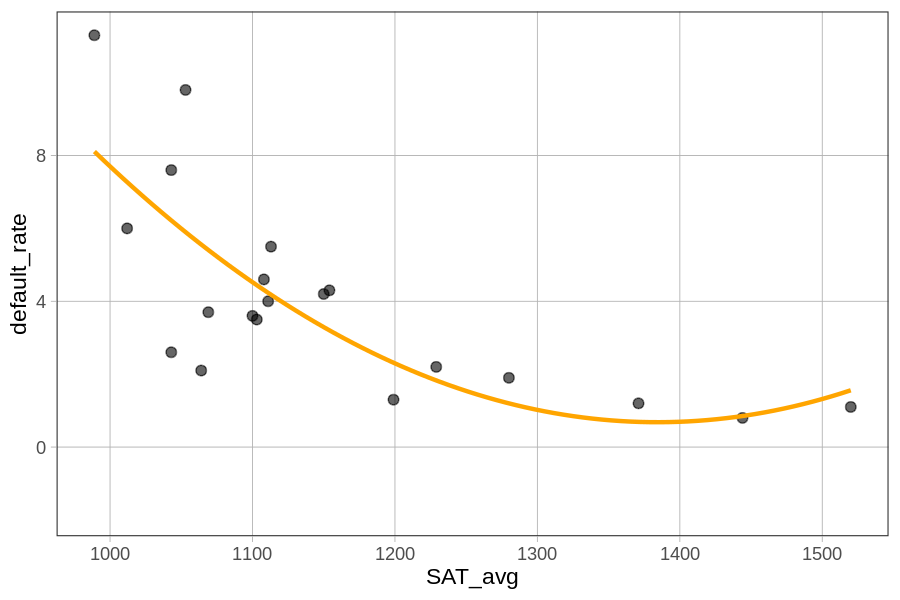

In [9]:
## Run this code but do not edit it
# create scatterplot: default_rate ~ SAT_avg, with degree 2 polynomial model overlayed
gf_point(default_rate ~ SAT_avg, data = sample_dat) %>% gf_lm(formula = y ~poly(x, 2), color = "orange")

**2.1** - Make a prediction: Will this polynomial regression model have a higher or lower $R^2$ value than the linear regression model? Justify your reasoning.

**R^2 would be higher because the quadratic regression model fits well even for schools with relatively high and low SAT_avg.** 

Let's test your prediction. To do so, we'll first need to fit the polynomial model. We can fit a degree 2 polynomial to the data using the `poly()` function inside of the `lm()` function. Run the cell below to see how it's done.

In [10]:
## Run this code but do not edit it
# degree 2 polynomial model for default_rate ~ SAT_avg
sat_model_2 <- lm(default_rate ~ poly(SAT_avg, 2), data = sample_dat)
sat_model_2


Call:
lm(formula = default_rate ~ poly(SAT_avg, 2), data = sample_dat)

Coefficients:
      (Intercept)  poly(SAT_avg, 2)1  poly(SAT_avg, 2)2  
            4.065             -8.391              4.355  


The equation for this model would be

$$
\hat{y}=4.065-8.391x+4.355x^2
$$

Where:

- $\beta_0=4.065$ is the intercept

- $\beta_1=-8.391$ is the coefficient of $x$, the linear term

- $\beta_2=4.355$ is the coefficient of $x^2$, the squared term

- $\hat{y}$ is the predicted `default_rate`

- $x$ is the `SAT_avg`

- $x^2$ is the `SAT_avg` to the power of 2


**2.2 -** Use the `summary` command on `sat_model_2` to see summary information about the quadratic model.

In [11]:
## Your code here
summary(sat_model_2)


Call:
lm(formula = default_rate ~ poly(SAT_avg, 2), data = sample_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6183 -0.9604  0.1192  0.9562  3.9014 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.0650     0.4361   9.321  4.3e-08 ***
poly(SAT_avg, 2)1  -8.3909     1.9504  -4.302 0.000483 ***
poly(SAT_avg, 2)2   4.3553     1.9504   2.233 0.039280 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.95 on 17 degrees of freedom
Multiple R-squared:  0.5802,	Adjusted R-squared:  0.5308 
F-statistic: 11.75 on 2 and 17 DF,  p-value: 0.0006251


**2.3 -** How does this model's $R^2$ value compare to that of the linear model? Was your prediction right? Explain.

**R^2 = 58.02%, which is higher than that for the linear model as predicted.** 

This analysis raises a natural question: Why stop at degree 2? By raising the degree, we can add more curves to our model, potentially better fitting the data! Let's visualize what happens when we increase the degree in our polynomial regression models.

#### Degree 3 Polynomial Model

$$
\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3
$$

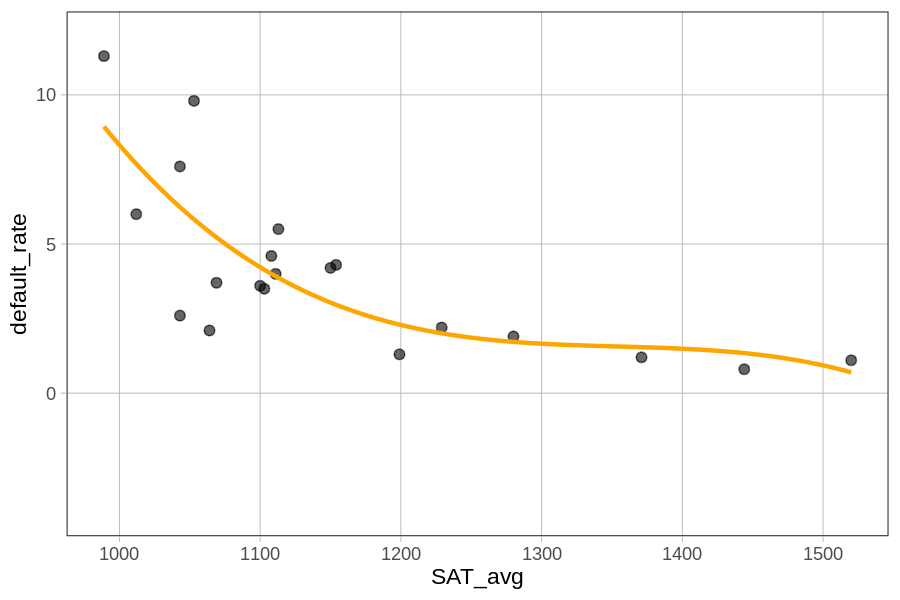

In [12]:
## Run this code but do not edit it
# create scatterplot: default_rate ~ SAT_avg, with degree 3 polynomial model overlayed
gf_point(default_rate ~ SAT_avg, data = sample_dat) %>% gf_lm(formula = y ~poly(x, 3), color = "orange") + ylim(-4,12)

#### Degree 5 Polynomial Model

$$
\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3 + \beta_{4}x^4 + + \beta_{5}x^5
$$

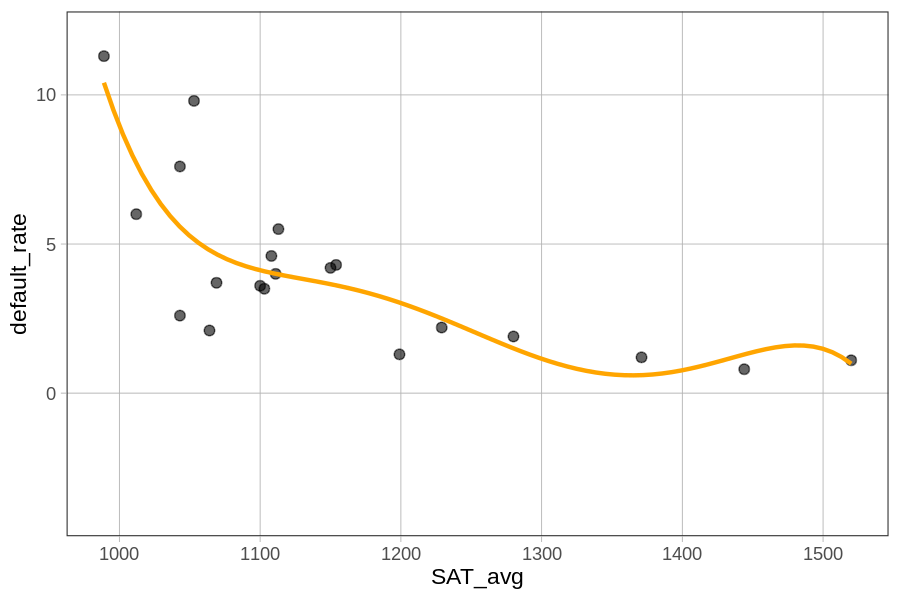

In [13]:
## Run this code but do not edit it
# create scatterplot: default_rate ~ SAT_avg, with degree 5 polynomial model overlayed
gf_point(default_rate ~ SAT_avg, data = sample_dat) %>% gf_lm(formula = y ~poly(x, 5), color = "orange") + ylim(-4,12)

#### Degree 12 Polynomial Model

$$
\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3 + \beta_{4}x^4 + + \beta_{5}x^5 + + \beta_{6}x^6 + ... + \beta_{12}x^{12}
$$

In [14]:
## Run this code but do not edit it
# create scatterplot: default_rate ~ SAT_avg, with degree 12 polynomial model overlayed
# gf_point(default_rate ~ SAT_avg, data = sample_dat) %>% gf_smooth(method = "lm", formula = y ~poly(x,12), color = "orange") + ylim(-4,14)

<img src="https://skewthescript.org/s/high_poly.png">

**2.4 -** Examine each plot for the polynmial models with degrees 3, 5, 12. Which model do you think would have the largest $R^2$ value? Why?

**12-th degree polynomial model would have the largest R^2 value; the default rates predicted by the 12-th degree model are extremely close to the actual default rates in this sample, albeit it is likely that the model is overfitting.** 

To determine which polynomial model fits the data the best, we will fit models for each degree (3, 5, 12).

In [15]:
## Run this code but do not edit it
# degree 3, 5, and 12 polynomial models for default_rate ~ SAT_avg
sat_model_3 <- lm(default_rate ~ poly(SAT_avg, 3), data = sample_dat)
sat_model_5 <- lm(default_rate ~ poly(SAT_avg, 5), data = sample_dat)
sat_model_12 <- lm(default_rate ~ poly(SAT_avg, 12), data = sample_dat)

Now we can compare each model's $R^2$ value. Normally, we use the `summary` command and read the $R^2$ value. However, since we've fit so many models, we don't want to print out the entire summary for each one. 

Instead, we'll use commands like this: `summary(sat_model_1)$r.squared`. The `$` operator is used to extract just the `r.squared` element from the full `summary`. We execute this command for each model, then print the results for ease of comparison.

In [16]:
## Run this code but do not edit it
# r-squared value for each model
r2_sat_model_1 <- summary(sat_model_1)$r.squared
r2_sat_model_2 <- summary(sat_model_2)$r.squared
r2_sat_model_3 <- summary(sat_model_3)$r.squared
r2_sat_model_5 <- summary(sat_model_5)$r.squared
r2_sat_model_12 <- summary(sat_model_12)$r.squared

# print each model's r-squared value
print(paste("The R squared value for the degree 1 model is", r2_sat_model_1))
print(paste("The R squared value for the degree 2 model is", r2_sat_model_2))
print(paste("The R squared value for the degree 3 model is", r2_sat_model_3))
print(paste("The R squared value for the degree 5 model is", r2_sat_model_5))
print(paste("The R squared value for the degree 12 model is", r2_sat_model_12))

[1] "The R squared value for the degree 1 model is 0.429432835950065"
[1] "The R squared value for the degree 2 model is 0.580193597490376"
[1] "The R squared value for the degree 3 model is 0.60314009577391"
[1] "The R squared value for the degree 5 model is 0.647445002110734"
[1] "The R squared value for the degree 12 model is 0.775449820723938"


**2.5 -** The degree 12 model has the highest $R^2$ value. Does that mean it's the "best" model? Why or why not?

**Hint:** Think about which model would do the best for predicting *the rest of the data* from the original full dataset.

**The 12-th degree model has the highest R^2 value, but it does not mean it is the best model. In fact, it would be not incorrect to say it is the worst because it is overfitting to the sample; the 12-th degree model outputs estimates that are extremely close to the actual default rates of this particular sample, and the extreme local minimums and maximums of the model may not be able to generalize/fit to the rest of the data.** 

### 3.0 - Prediction, model tuning, & machine learning

In prior notebooks, we've used our models to make inferences about default rates. However, sometimes in data science, we care more about predictions than we do about inferences. In particular, many data science tasks ask for making accurate predictions on *new* data - data that hadn't yet been collected when we first fit the model. This process of building models to predict new data, especially when it's automated, is called **machine learning.** 

The key to machine learning is building models that make accurate predictions on **test** data - unseen data that weren't used when fitting the model. Let's see how this works. First, let's create a test dataset of 10 randomly sampled colleges. Importantly, these are colleges that **our models didn't see while fitting**:

In [17]:
## Run this code but do not edit it
# create a data set to test the model with 10 new, randomnly selected observations
# not used to train the model
set.seed(23)
test_dat <- sample(dat, size = 10)

**3.1 -** Use the `head` command to list all 10 observations in the `test_dat` data set.

In [18]:
## Your code here
head(test_dat)

,OPEID,name,city,state,region,median_debt,default_rate,highest_degree,ownership,locale,⋯,net_tuition,ed_spending_per_student,avg_faculty_salary,pct_PELL,pct_fed_loan,grad_rate,pct_firstgen,med_fam_income,med_alum_earnings,orig.id
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
925,364600,Texas Woman's University,Denton,TX,Rockies & Southwest,14.000,5.1,Graduate,Public,Small City,⋯,6.080,6.595,8.764,39.00,43.88,48.14,41.57868,32.124,49.724,925
284,1025600,Benedictine College,Atchison,KS,Midwest,19.000,4.0,Graduate,Private nonprofit,Town,⋯,12.879,7.442,6.707,16.55,51.56,65.02,14.96063,95.543,47.772,284
456,244900,Avila University,Kansas City,MO,Midwest,19.209,5.1,Graduate,Private nonprofit,Large City,⋯,12.725,6.958,6.284,44.32,79.79,51.47,36.74699,38.722,48.029,456
615,291400,Catawba College,Salisbury,NC,South,14.486,6.5,Bachelors,Private nonprofit,Suburb,⋯,23.325,10.062,7.121,37.37,63.70,55.52,29.92366,48.930,43.015,615
913,363200,Texas A & M University-College Station,College Station,TX,Rockies & Southwest,15.404,2.2,Graduate,Public,Small City,⋯,11.976,17.485,12.231,21.34,29.61,82.53,29.95075,58.904,66.566,913
1015,2136600,Wisconsin Lutheran College,Milwaukee,WI,Midwest,19.244,3.0,Graduate,Private nonprofit,Large City,⋯,12.264,9.173,6.720,28.22,75.77,64.09,29.36803,68.509,47.930,1015


The following code visualizes the new test data alongside the train data (the data we used to originally fit our models).

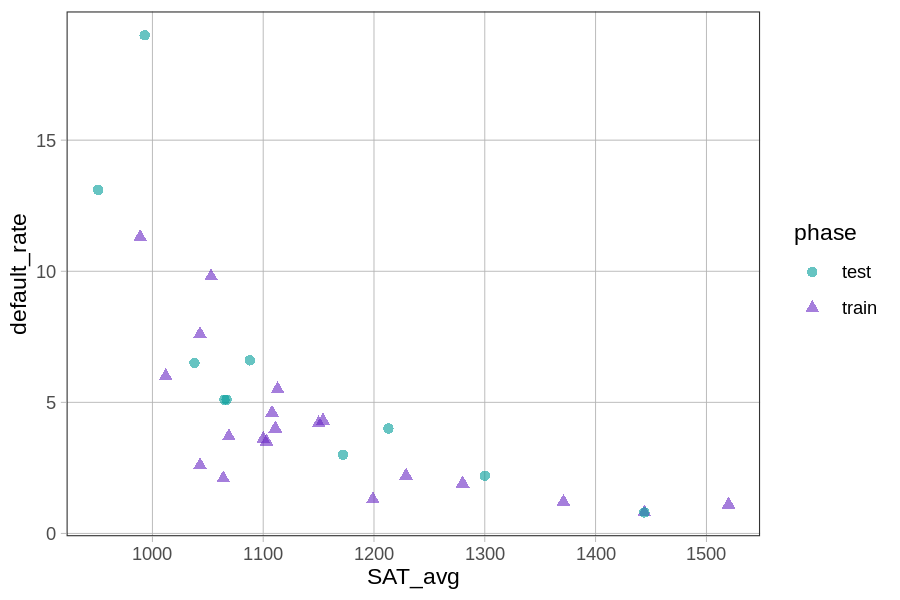

In [19]:
## Run this code but do not edit it
# label train and test sets
sample_dat$phase <- "train"
test_dat$phase <- "test"

# concatenate two datasets
full_dat <- rbind(sample_dat, test_dat)

# create scatterplot: default_rate ~ SAT_avg, with degree 5 polynomial model overlayed
gf_point(default_rate ~ SAT_avg, data = full_dat, color = ~phase, shape = ~phase)

**3.2 -** Of all the polynomial models we fit before, which do you think would do best in predicting the default rates in the test dataset? Note: Use your gut and intution here. No calculations required.

**I think the quadratic or the quintic model would provide the best general fit.** 

Let's see how good one of our models is at predicting default rates. The R code in the next cell uses the `predict` function to make predictions on the test dataset. In this case, output shows the predicted default rates for the 10 test set colleges, as predicted by our degree 5 model.

In [20]:
## Run this code but do not edit it
# get predictions for degree 5 mdoel
pred_deg5 = predict(sat_model_5, newdata = data.frame(SAT_avg = test_dat$SAT_avg))
pred_deg5

1         2         3         4         5         6         7         8 
 4.711958  2.801175  4.766106  5.831351  1.152554  3.416390  9.851907 18.106027 
        9        10 
 1.297442  4.282680

So, how can we interpret these values? Well, the last college in our test set is `University of New Orleans`, which has an `SAT_avg` value of `1088` and a `default_rate` of `6.6`. It's shown here on the graph, alongside our degree 5 model.

In [21]:
### Run this code but do not edit it
## create scatterplot: default_rate ~ SAT_avg, with degree 5 polynomial model overlayed
#gf_point(default_rate ~ SAT_avg, data = sample_dat, color = ~phase, shape = ~phase) %>% gf_lm(formula = y ~poly(x, 5), color = "orange") %>% gf_point(default_rate ~ SAT_avg, data = full_dat, color = ~phase, shape = ~phase) + ylim(0,19)

<img src="https://skewthescript.org/s/new_orleans.png">

Our degree 5 model's predicted default rate for this first data point was `4.28`.  That means that our degree 5 model under-estimates the actual value for defalut rate by...

$$
6.6-4.28 = 2.32
$$

The model's prediction and error is visualized in the plot below:

In [22]:
### Run this code but do not edit it
## create scatterplot: default_rate ~ SAT_avg, with degree 5 polynomial model overlayed
#gf_point(default_rate ~ SAT_avg, data = sample_dat, color = ~phase, shape = ~phase) %>% gf_lm(formula = y ~poly(x, 5), color = "orange") %>% gf_point(default_rate ~ SAT_avg, data = full_dat, color = ~phase, shape = ~phase) + ylim(0,19)

<img src="https://skewthescript.org/s/new_orleans_residual.png">


So, its predicted default rate is "off" by about 2 percentage points! This is pretty amazing, considering the model had only 20 training data values and  `University of New Orleans` was not at all included in the dataset used the fit the model. This is the power of machine learning! Predicting *unseen* data!

This is just one prediction. We're really interested in how this model performed across all its predictions. For that, let's measure its $R^2$ (prediciton strength) on the test set!

We can use the `cor` function to correlate the predictions with the actual default rates ($r$) and then square that value to get $R^2$, which gets us the prediction strength!

In [23]:
## Run this code but do not edit it
# Get correlation between predicted and actual default rates in test set
cor(test_dat$default_rate, pred_deg5) ^ 2

[1] 0.6165466

We can now repeat this same process for all polynomial degrees.

In [24]:
## Run this code but do not edit it
# Storing test set predictions for all models
pred_deg1 = predict(sat_model_1, newdata = data.frame(SAT_avg = test_dat$SAT_avg))
pred_deg2 = predict(sat_model_2, newdata = data.frame(SAT_avg = test_dat$SAT_avg))
pred_deg3 = predict(sat_model_3, newdata = data.frame(SAT_avg = test_dat$SAT_avg))
pred_deg5 = predict(sat_model_5, newdata = data.frame(SAT_avg = test_dat$SAT_avg))
pred_deg12 = predict(sat_model_12, newdata = data.frame(SAT_avg = test_dat$SAT_avg))

# print each model's r-squared value
print(paste("The test R squared value for the degree 1 model is", cor(test_dat$default_rate, pred_deg1) ^ 2))
print(paste("The test R squared value for the degree 2 model is", cor(test_dat$default_rate, pred_deg2) ^ 2))
print(paste("The test R squared value for the degree 3 model is", cor(test_dat$default_rate, pred_deg3) ^ 2))
print(paste("The test R squared value for the degree 5 model is", cor(test_dat$default_rate, pred_deg5) ^ 2))
print(paste("The test R squared value for the degree 12 model is", cor(test_dat$default_rate, pred_deg12) ^ 2))

[1] "The test R squared value for the degree 1 model is 0.55824446697698"
[1] "The test R squared value for the degree 2 model is 0.70025122602337"
[1] "The test R squared value for the degree 3 model is 0.733729012084851"
[1] "The test R squared value for the degree 5 model is 0.616546630372038"
[1] "The test R squared value for the degree 12 model is 0.176121561427707"


**3.3 -** Compare the $R^2$ estimates for each model. Which models did well? Which models did poorly? Why do you think this is?

**The cubic model did the best; it the highest R^2 value of 0.73. The cubic model is probably the best because it is not too simple as the quadratic model but general enough to fit the data and does not overfit like the other higher degree models.** 

**3.4 -** In machine learning, the central goal is to build our models so as to avoid "underfitting" and "overfitting" our models to the training data. What do you think these terms mean? Which of our models were underfit? Which do you think were overfit? Explain.

**Underfitting means that a model is too simple that the model is poor to both trained and untrained data. Overfitting means that a model is too complex that it only models the relationship within trained data and fails to generalize to outside data.** 

Recall that we built our polynomial models here with just one predictor: $x$ (`SAT_avg`). Yet, those models could end up being quite complex...

$$
\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3
$$

Now, imagine that we wanted to bring in multiple predictors ($x_1$ = `SAT_avg`, $x_2$ = `net_tuition`, $x_3$ = `grad_rate`) for muliple regression. Plus, imagine that we decided to add in some polynomial terms for each of these predictors. We could end up with a mdoel that looks ever more complicated, with literally hundreds of terms...

$$
\hat{y} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_2 + \beta_{5}x_2^2 + \beta_{5}x_2^3 + \beta_{6}x_3 + \beta_{7}x_3^2 + ...
$$

**3.5 -** Is it always good to add more predictors and add more polynomial terms to your model? Explain why or why not.

**Adding too many predictors and too many polynomial terms may lead to difficulty in efficiently minimizing the residuals.** 

### 4.0 - In-class prediction competition

Now you have all the tools you need to build very powerful prediction models! This means that it's time for a friendly competition :)

The code below takes the full dataset and splits it into larger train and test datasets. 80% of the colleges will go into the train dataset. 20% will go into the test dataset:

In [25]:
## Run but do not edit this code

# set training data to be 80% of all colleges
train_size <- floor(0.8 * nrow(dat))

## sample row indeces
set.seed(123)
train_ind <- sample(seq_len(nrow(dat)), size = train_size)

train <- dat[train_ind, ]
test <- dat[-train_ind, ]

In [26]:
dim(train)

[1] 842  26

In [27]:
dim(test)

[1] 211  26

Now it's time to compete! 

**Goal:** Create the most accurate prediction model of colleges' default rates.

**Evaluation:** Whichever student has the highest $R^2$ on the test set wins.

**Guidelines** Save your best model as an object called `my_model`. You are only allowed to fit models on the train set (not on the test set). You may use as many predictors and as many polynomial terms as you'd like. Just be warned: Don't fall into the trap of overfitting! Choose only the most important variables and keep your models simple, so that you can generalize well to the test set. Periodically test your model on the test set and then make adjustments as necessary. 

Go!


Call:
lm(formula = default_rate ~ poly(SAT_avg, 2), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7999 -1.3755 -0.2131  1.0152 14.9110 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.09846    0.08967   56.85   <2e-16 ***
poly(SAT_avg, 2)1 -72.82540    2.60209  -27.99   <2e-16 ***
poly(SAT_avg, 2)2  36.76029    2.60209   14.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.602 on 839 degrees of freedom
Multiple R-squared:  0.5395,	Adjusted R-squared:  0.5384 
F-statistic: 491.4 on 2 and 839 DF,  p-value: < 2.2e-16


[1] 0.6411912


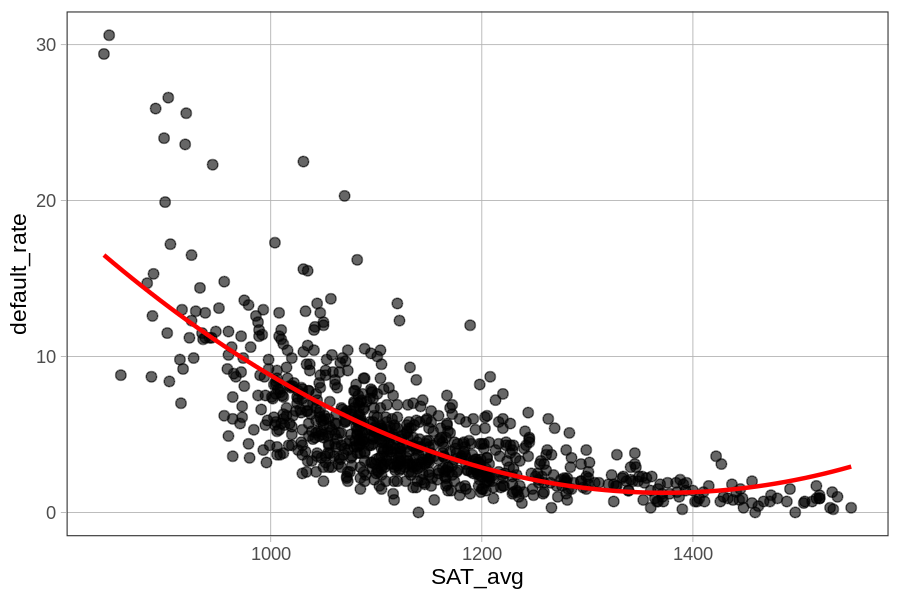

In [35]:
sat_model <- lm(default_rate~poly(SAT_avg, 2), data=train)
gf_point(default_rate~SAT_avg, data=train) %>% gf_lm(formula=y~poly(x,2), color="red")
summary(sat_model)

print(cor(test$default_rate, predict(sat_model, newdata=test)^2))


Call:
lm(formula = default_rate ~ poly(grad_rate, 2), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8438 -1.1265 -0.1368  0.7940 19.1818 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.09846    0.09009  56.595  < 2e-16 ***
poly(grad_rate, 2)1 -78.98269    2.61405 -30.215  < 2e-16 ***
poly(grad_rate, 2)2  19.08538    2.61405   7.301 6.63e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.614 on 839 degrees of freedom
Multiple R-squared:  0.5352,	Adjusted R-squared:  0.5341 
F-statistic: 483.1 on 2 and 839 DF,  p-value: < 2.2e-16


[1] 0.5893669


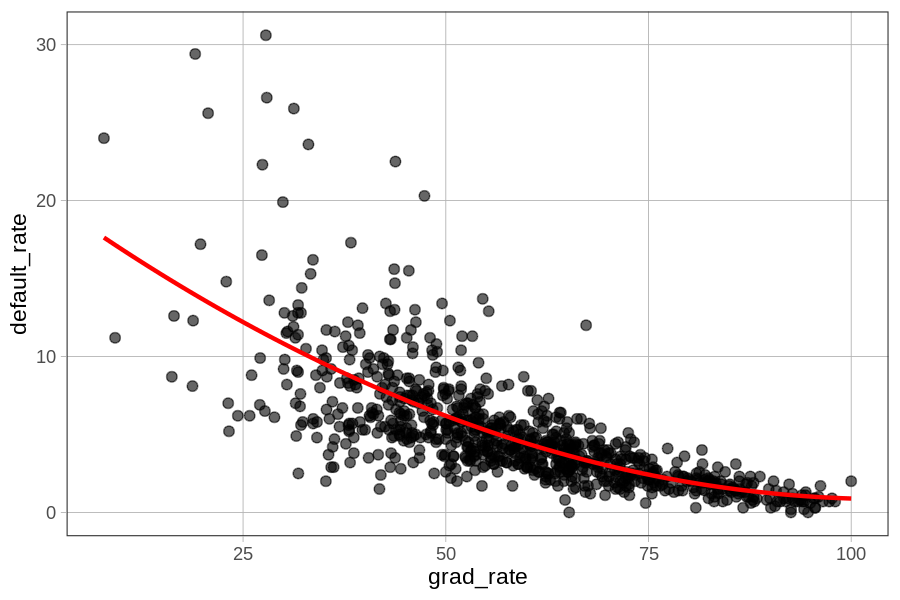

In [ ]:
grad_model <- lm(default_rate~poly(grad_rate,2), data=train)
gf_point(default_rate~grad_rate, data=train) %>% gf_lm(formula=y~poly(x,2), color="red")
summary(grad_model)

print(cor(test$default_rate, predict(grad_model, newdata=test))^2)


Call:
lm(formula = default_rate ~ poly(med_alum_earnings, 3), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5747  -1.2595  -0.2338   0.9742  17.5739 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   5.09846    0.09171  55.593  < 2e-16 ***
poly(med_alum_earnings, 3)1 -68.12280    2.66117 -25.599  < 2e-16 ***
poly(med_alum_earnings, 3)2  38.00111    2.66117  14.280  < 2e-16 ***
poly(med_alum_earnings, 3)3 -17.78326    2.66117  -6.682 4.28e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.661 on 838 degrees of freedom
Multiple R-squared:  0.5189,	Adjusted R-squared:  0.5172 
F-statistic: 301.3 on 3 and 838 DF,  p-value: < 2.2e-16


[1] 0.5850325


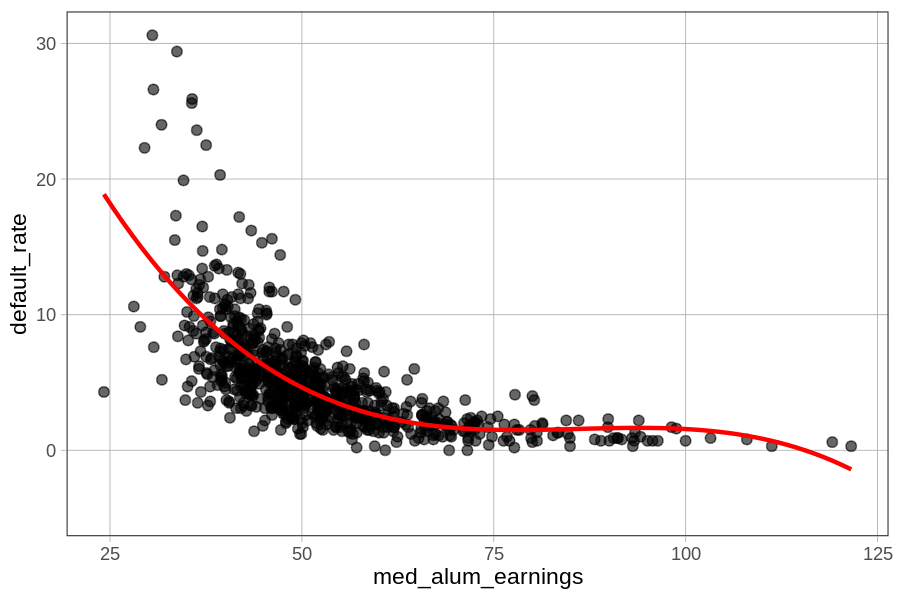

In [ ]:
alum_earnings_model <- lm(default_rate~poly(med_alum_earnings,3), data=train)
gf_point(default_rate~med_alum_earnings, data=train) %>% gf_lm(formula=y~poly(x,3), color="red")
summary(alum_earnings_model)
print(cor(test$default_rate, predict(alum_earnings_model, newdata=test))^2)


Call:
lm(formula = default_rate ~ poly(pct_PELL, 2), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.780  -1.459  -0.374   1.151  23.226 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.09846    0.09587  53.178  < 2e-16 ***
poly(pct_PELL, 2)1 74.50105    2.78201  26.780  < 2e-16 ***
poly(pct_PELL, 2)2 17.07939    2.78201   6.139 1.28e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.782 on 839 degrees of freedom
Multiple R-squared:  0.4736,	Adjusted R-squared:  0.4723 
F-statistic: 377.4 on 2 and 839 DF,  p-value: < 2.2e-16


[1] 0.3676521


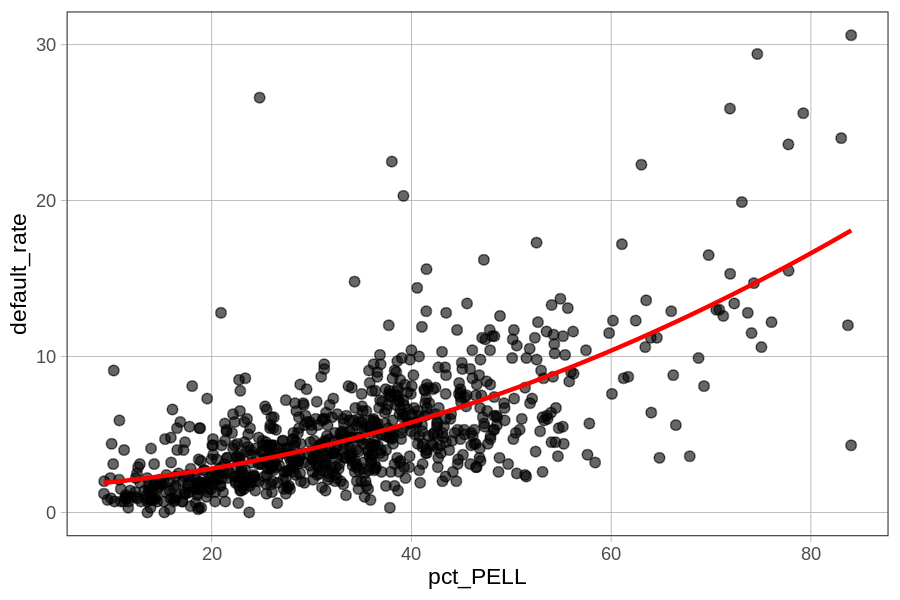

In [31]:
test_model <- lm(default_rate~poly(pct_PELL,2), data=train)
gf_point(default_rate~pct_PELL, data=train) %>% gf_lm(formula=y~poly(x,2), color="red")
summary(test_model)
print(cor(test$default_rate, predict(test_model, newdata=test))^2)


Call:
lm(formula = default_rate ~ poly(avg_faculty_salary, 3), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9560 -1.8486 -0.5053  1.2021 22.1719 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.0985     0.1123  45.381  < 2e-16 ***
poly(avg_faculty_salary, 3)1 -54.4152     3.2600 -16.692  < 2e-16 ***
poly(avg_faculty_salary, 3)2  20.2833     3.2600   6.222 7.75e-10 ***
poly(avg_faculty_salary, 3)3  -7.5581     3.2600  -2.318   0.0207 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.26 on 838 degrees of freedom
Multiple R-squared:  0.278,	Adjusted R-squared:  0.2754 
F-statistic: 107.6 on 3 and 838 DF,  p-value: < 2.2e-16


[1] 0.4080041


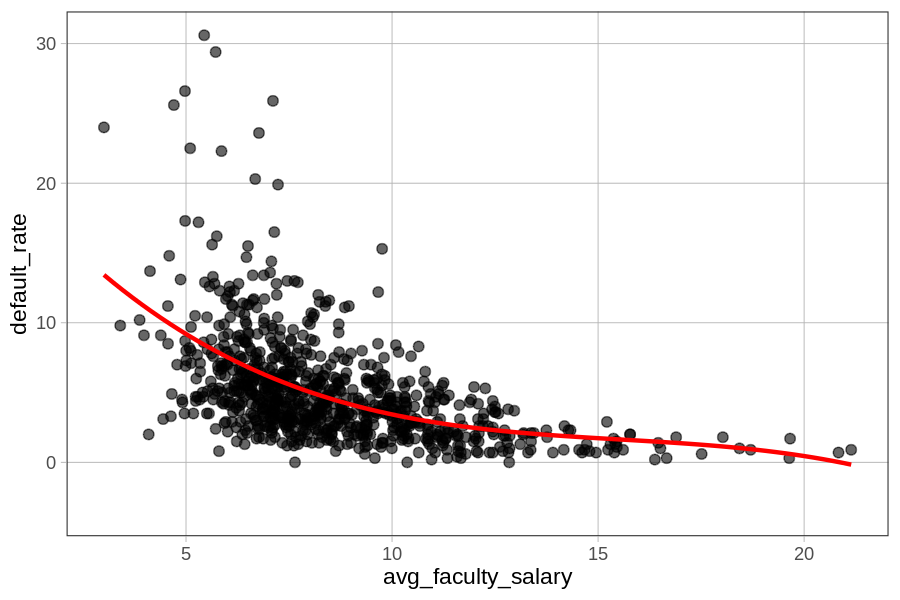

In [32]:
test_model <- lm(default_rate~poly(avg_faculty_salary,3), data=train)
gf_point(default_rate~avg_faculty_salary, data=train) %>% gf_lm(formula=y~poly(x,3), color="red")
summary(test_model)
print(cor(test$default_rate, predict(test_model, newdata=test))^2)

In [33]:
my_model <- lm(default_rate~poly(SAT_avg,2)+grad_rate+pct_PELL+poly(avg_faculty_salary,3)+poly(med_alum_earnings,3)+highest_degree+region+hbcu, data=train)
summary(my_model)


Call:
lm(formula = default_rate ~ poly(SAT_avg, 2) + grad_rate + pct_PELL + 
    poly(avg_faculty_salary, 3) + poly(med_alum_earnings, 3) + 
    highest_degree + region + hbcu, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1707 -0.9298 -0.0557  0.8909 12.7567 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    7.403498   0.725863  10.200  < 2e-16 ***
poly(SAT_avg, 2)1            -20.122497   5.031725  -3.999 6.93e-05 ***
poly(SAT_avg, 2)2             16.829599   2.866826   5.870 6.30e-09 ***
grad_rate                     -0.055076   0.008764  -6.285 5.32e-10 ***
pct_PELL                       0.021927   0.008698   2.521 0.011890 *  
poly(avg_faculty_salary, 3)1   0.035836   3.818445   0.009 0.992514    
poly(avg_faculty_salary, 3)2   2.453103   2.506339   0.979 0.327986    
poly(avg_faculty_salary, 3)3  -7.897237   2.159600  -3.657 0.000272 ***
poly(med_alum_earnings, 3)1  -22.861430   3.925488 

In [34]:
# run this code to get the R^2 value on the test set from your model
test_predictions = predict(my_model, newdata = test)
print(paste("The test R^2 value was: ", cor(test$default_rate, test_predictions) ^ 2))

[1] "The test R^2 value was:  0.707429439222334"


### 5.0 - NATIONWIDE prediction competition

**Competition:** We're hosting a *nationwide* competition to see which student can build the best model for predicting student loan default rates at different colleges.

**Evaluation**: Across the country, all students are using the same train and test sets as you did in the prior exercise to fit and evaluate their models. Your goal: Build a model that gives the best predictions on this test set. The student model that produces the highest $R^2$ value on the test set wins!

**Submission Process**: If you aren't satisfied with your model's performance, continue tweaking it, training it, and testing it, using the code you developed in the prior section. Once you are satisfied with your prediction accuracy on the test set, ask **your teacher** to email your final $R^2$ value (on the test set) to Dashiell Young-Saver at youngsaver@skewthescript.org. In the email, your teacher will use the subject line "Prediction competition submission." Please do not send the email yourself, do not have your teacher cc you on the email, and do not have your teacher include your name in the body of the email - all emails that contain any name or email info for students will be discarded. The top $R^2$ performers will be asked to submit their full notebooks (names removed) for validation.

**Deadline:** The deadline to submit (via email process outlined above) is **June 16, 2023**. Submissions before the deadline will be accepted and reviewed on a rolling basis, starting in mid-May.

**Note:** There are ways to "cheat" on this competition by looking directly at the test set data values and designing your model to predict those values exactly (or approximately). However, based on the design of your model (which we'll see when you share your notebook), it's pretty easy for us to tell if you've done this. So, don't do it! Your submission will be discarded.

### Feedback (Required)

Please take 2 minutes to fill out <a href="https://forms.gle/ePwTHdSeAc8FvVjg7">this anonymous notebook feedback form</a>, so we can continue improving this notebook for future years!